In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [58]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [59]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\경기도 수원시_일평균 유동인구 데이터\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\경기도 수원시_일평균 유동인구 데이터\\경기도 수원시_일평균 유동인구 데이터_20211130.csv']

In [60]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,격자 id 번호,좌측 격자 위치,상단 격자 위치,우측 격자 위치,하단 격자 위치,일평균 유동인구,일평균 남성 유동인구,일평균 여성 유동인구,0세_20세 미만 일평균 유동인구,20세_40세 미만 일평균 유동인구,40세_65세 미만 일평균 유동인구,65세 이상 일평균 유동인구,데이터기준일자
0,73,305077,520668,305177,520568,49.877732,23.263005,26.614727,4.540027,15.489918,24.762978,5.084809,2021-11-30
1,74,305077,520568,305177,520468,33.886284,15.945683,17.940601,3.193770,10.588552,16.595792,3.508169,2021-11-30
2,75,305077,520468,305177,520368,9.971003,4.796057,5.174947,0.910194,3.256454,4.879624,0.924731,2021-11-30
3,76,305077,520368,305177,520268,46.949565,21.967829,24.981737,4.202525,14.737133,23.391829,4.618079,2021-11-30
4,77,305077,520268,305177,520168,161.531066,76.268689,85.262377,14.877678,50.634754,78.907760,17.110874,2021-11-30


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   격자 id 번호             10879 non-null  int64  
 1   좌측 격자 위치             10879 non-null  int64  
 2   상단 격자 위치             10879 non-null  int64  
 3   우측 격자 위치             10879 non-null  int64  
 4   하단 격자 위치             10879 non-null  int64  
 5   일평균 유동인구             10879 non-null  float64
 6   일평균 남성 유동인구          10879 non-null  float64
 7   일평균 여성 유동인구          10879 non-null  float64
 8   0세_20세 미만 일평균 유동인구   10879 non-null  float64
 9   20세_40세 미만 일평균 유동인구  10879 non-null  float64
 10  40세_65세 미만 일평균 유동인구  10879 non-null  float64
 11  65세 이상 일평균 유동인구      10879 non-null  float64
 12  데이터기준일자              10879 non-null  object 
dtypes: float64(7), int64(5), object(1)
memory usage: 1.1+ MB


In [62]:
df.describe()

,격자 id 번호,좌측 격자 위치,상단 격자 위치,우측 격자 위치,하단 격자 위치,일평균 유동인구,일평균 남성 유동인구,일평균 여성 유동인구,0세_20세 미만 일평균 유동인구,20세_40세 미만 일평균 유동인구,40세_65세 미만 일평균 유동인구,65세 이상 일평균 유동인구
count,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000
mean,9871.476882,312173.157735,520090.079235,312273.157735,519990.079235,641.237060,331.927531,309.309529,49.637806,259.140256,280.380299,52.078699
std,4631.163073,3354.692819,2881.480906,3354.692819,2881.480906,1331.697315,691.615566,651.678996,107.769641,606.645783,559.113453,94.501413
min,73.000000,305077.000000,514168.000000,305177.000000,514068.000000,1.000000,0.344286,0.000000,0.000000,0.150000,0.200000,0.000000
25%,6155.500000,309477.000000,517868.000000,309577.000000,517768.000000,56.399253,31.354656,24.084978,2.766852,20.891225,25.724593,3.740422
50%,10131.000000,312377.000000,519968.000000,312477.000000,519868.000000,261.938626,135.699879,122.289508,16.916440,95.307570,116.734064,20.267186
75%,13452.500000,314777.000000,522168.000000,314877.000000,522068.000000,784.500148,399.063497,382.500045,57.953645,288.914030,350.812063,65.844481
max,19804.000000,319377.000000,527868.000000,319477.000000,527768.000000,44293.320520,21596.663330,22696.657190,3950.946284,18900.091040,18193.205410,3249.077787


In [63]:
df.describe(include=np.object)

,데이터기준일자
count,10879
unique,1
top,2021-11-30
freq,10879


In [64]:
df.isnull().sum()

격자 id 번호               0
좌측 격자 위치               0
상단 격자 위치               0
우측 격자 위치               0
하단 격자 위치               0
일평균 유동인구               0
일평균 남성 유동인구            0
일평균 여성 유동인구            0
0세_20세 미만 일평균 유동인구     0
20세_40세 미만 일평균 유동인구    0
40세_65세 미만 일평균 유동인구    0
65세 이상 일평균 유동인구        0
데이터기준일자                0
dtype: int64

In [65]:
df[['좌측 격자 위치  ','우측 격자 위치']] = df[['좌측 격자 위치  ','우측 격자 위치']]//100 - 3050
df[['상단 격자 위치','하단 격자 위치']] = 138-(df[['상단 격자 위치','하단 격자 위치']]//100 - 5140)

In [66]:
df.describe()

,격자 id 번호,좌측 격자 위치,상단 격자 위치,우측 격자 위치,하단 격자 위치,일평균 유동인구,일평균 남성 유동인구,일평균 여성 유동인구,0세_20세 미만 일평균 유동인구,20세_40세 미만 일평균 유동인구,40세_65세 미만 일평균 유동인구,65세 이상 일평균 유동인구
count,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000
mean,9871.476882,70.961577,77.779208,71.961577,78.779208,641.237060,331.927531,309.309529,49.637806,259.140256,280.380299,52.078699
std,4631.163073,33.546928,28.814809,33.546928,28.814809,1331.697315,691.615566,651.678996,107.769641,606.645783,559.113453,94.501413
min,73.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.344286,0.000000,0.000000,0.150000,0.200000,0.000000
25%,6155.500000,44.000000,57.000000,45.000000,58.000000,56.399253,31.354656,24.084978,2.766852,20.891225,25.724593,3.740422
50%,10131.000000,73.000000,79.000000,74.000000,80.000000,261.938626,135.699879,122.289508,16.916440,95.307570,116.734064,20.267186
75%,13452.500000,97.000000,100.000000,98.000000,101.000000,784.500148,399.063497,382.500045,57.953645,288.914030,350.812063,65.844481
max,19804.000000,143.000000,137.000000,144.000000,138.000000,44293.320520,21596.663330,22696.657190,3950.946284,18900.091040,18193.205410,3249.077787


## 시각화

In [30]:
df.columns

Index(['격자 id 번호', '좌측 격자 위치  ', '상단 격자 위치', '우측 격자 위치', '하단 격자 위치',
       '일평균 유동인구', '일평균 남성 유동인구', '일평균 여성 유동인구', '0세_20세 미만 일평균 유동인구',
       '20세_40세 미만 일평균 유동인구', '40세_65세 미만 일평균 유동인구', '65세 이상 일평균 유동인구',
       '데이터기준일자'],
      dtype='object')

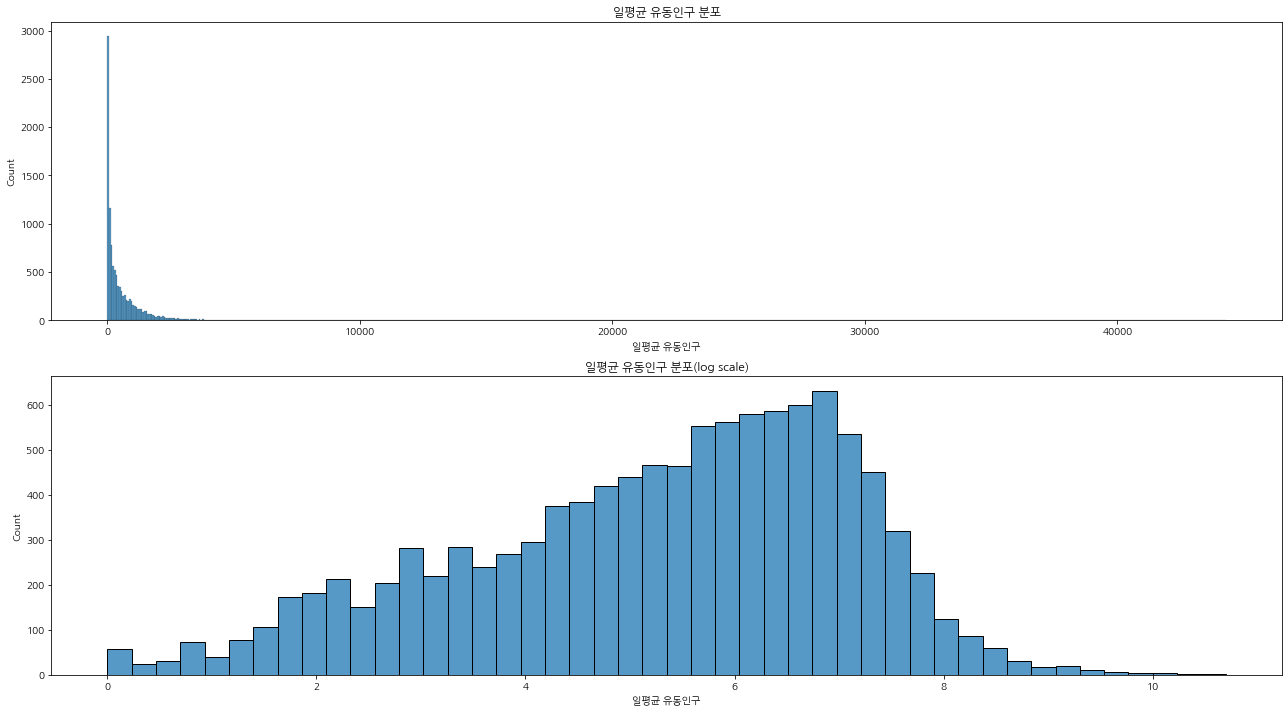

In [114]:
sub_df = df.groupby(['좌측 격자 위치  ', '상단 격자 위치'],as_index=False)['일평균 유동인구'].sum()
fig,axes = plt.subplots(2,1,figsize=(18,10))
sns.histplot(data=sub_df,x='일평균 유동인구',ax=axes[0]).set(title='일평균 유동인구 분포')
sns.histplot(data=np.log(sub_df),x='일평균 유동인구',ax=axes[1]).set(title='일평균 유동인구 분포(log scale)')
plt.tight_layout()

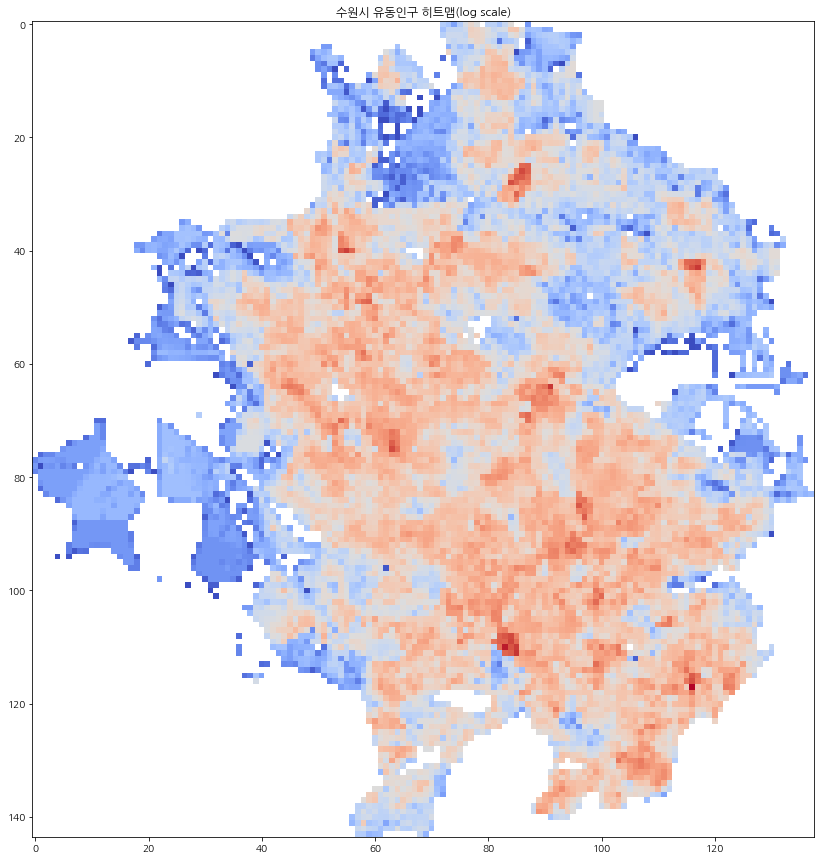

In [120]:
from matplotlib import colormaps as cm
sub_df = df.groupby(['좌측 격자 위치  ', '상단 격자 위치'],as_index=False)['일평균 유동인구'].sum()
city_map = np.zeros((sub_df['좌측 격자 위치  '].max()+1,sub_df['상단 격자 위치'].max()+1))
sub_df
for i in range(len(sub_df)):
    r,c,n = sub_df.loc[i].values
    city_map[int(r)][int(c)] += n
city_map = np.log(city_map)
plt.figure(figsize=(15,15))
plt.title('수원시 유동인구 히트맵(log scale)')
plt.imshow(city_map,cmap = cm['coolwarm'])
plt.show()

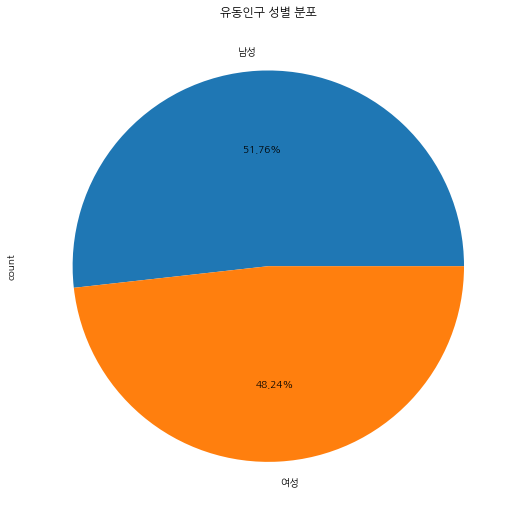

In [127]:
plt.figure(figsize=(9,9))
plt.title('유동인구 성별 분포')
plt.ylabel('count')
g = plt.pie([df['일평균 남성 유동인구'].sum(),df['일평균 여성 유동인구'].sum()], labels=['남성','여성'], autopct='%.2f%%')

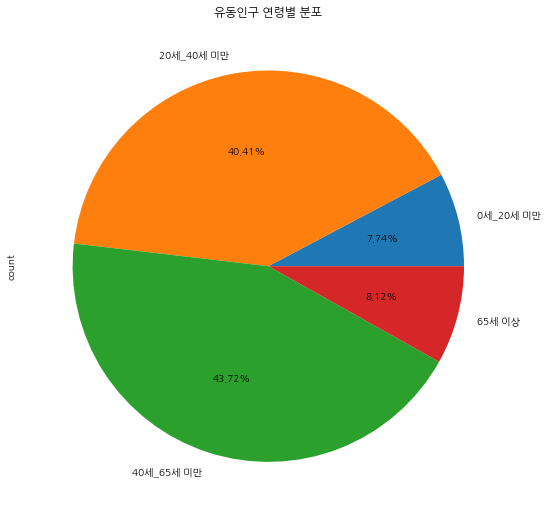

In [126]:
plt.figure(figsize=(9,9))
ratio = [df['0세_20세 미만 일평균 유동인구'].sum(),df['20세_40세 미만 일평균 유동인구'].sum(),df['40세_65세 미만 일평균 유동인구'].sum(),df['65세 이상 일평균 유동인구'].sum()]
plt.title('유동인구 연령별 분포')
plt.ylabel('count')
g = plt.pie(ratio, labels=['0세_20세 미만','20세_40세 미만', '40세_65세 미만', '65세 이상'], autopct='%.2f%%')